In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import os
os.listdir()

['.ipynb_checkpoints',
 'new_test.csv',
 'submission.csv',
 'submission1.csv',
 'submission2.csv',
 'submission3.csv',
 'submission4.csv',
 'SubmissionFile.csv',
 'test.csv',
 'train.csv',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'VariableDefinitions.csv']

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
variables = pd.read_csv('VariableDefinitions.csv')
subFile = pd.read_csv('SubmissionFile.csv')

In [5]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
train.shape, train.size

((23524, 13), 305812)

In [7]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [9]:
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [10]:
train['bank_account'] = train['bank_account'].map({'No' : 0, 'Yes' : 1})


In [11]:
train['country'].value_counts()

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64

In [12]:
train['bank_account'].value_counts()

0    20212
1     3312
Name: bank_account, dtype: int64

In [13]:
train.head(10)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,0,Rural,No,7,26,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,0,Rural,Yes,7,32,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,0,Rural,Yes,1,42,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,1,Rural,Yes,3,54,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,0,Urban,Yes,3,76,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


In [14]:
pd.crosstab(train['country'], train['bank_account'])

bank_account,0,1
country,,
Kenya,4547,1521
Rwanda,7732,1003
Tanzania,6013,607
Uganda,1920,181


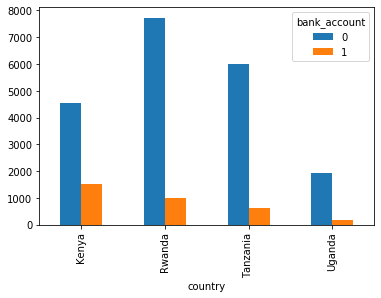

In [15]:
pd.crosstab(train['country'], train['bank_account']).plot(kind="bar")

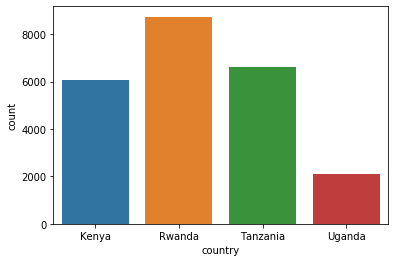

In [16]:
sns.countplot('country', data=train)

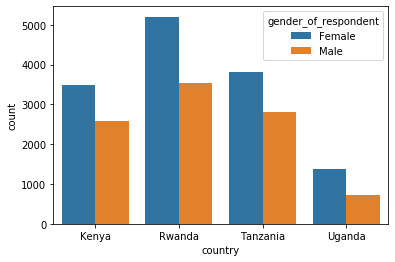

In [17]:
sns.countplot('country', data=train, hue= "gender_of_respondent",)

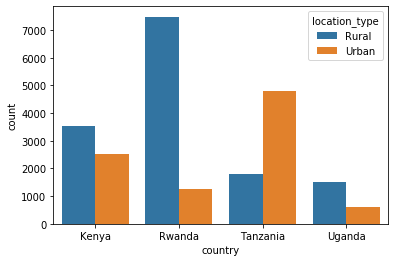

In [18]:
sns.countplot('country', data=train, hue= "location_type",)

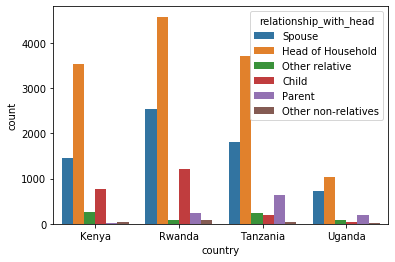

In [19]:
sns.countplot('country', data=train, hue= "relationship_with_head",)

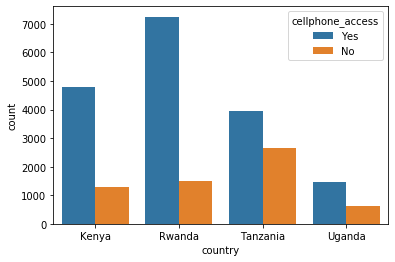

In [20]:
sns.countplot('country', data=train, hue= "cellphone_access",)

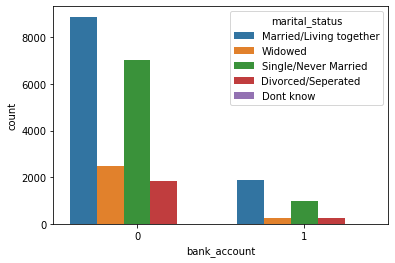

In [21]:
sns.countplot('bank_account', data=train, hue= "marital_status",)

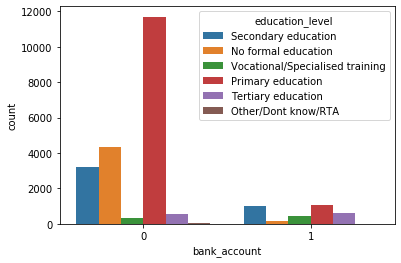

In [22]:
sns.countplot('bank_account', data=train, hue= "education_level",)

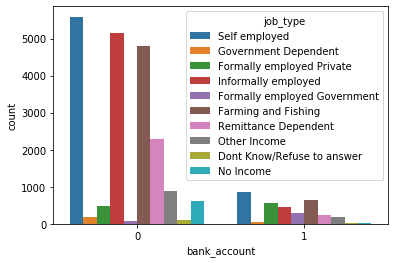

In [23]:
sns.countplot('bank_account', data=train, hue= "job_type",)

In [24]:
train['location_type'] = train['location_type'].map({'Rural': 0, 'Urban': 1})
test['location_type'] = test['location_type'].map({'Rural': 0, 'Urban': 1})

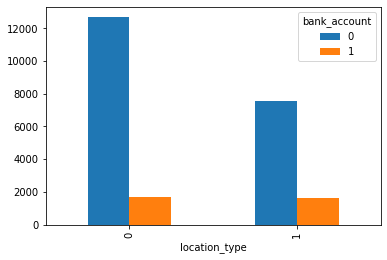

In [25]:
pd.crosstab(train['location_type'], train['bank_account']).plot(kind="bar")

In [26]:
#to represent mutiple countrys in 0s and 1s, use get dummies
train = pd.get_dummies(train, columns= ['country', 'relationship_with_head', 'marital_status'], prefix_sep='_')
test = pd.get_dummies(test, columns= ['country', 'relationship_with_head', 'marital_status'], prefix_sep='_')

In [27]:
train.head()

,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,education_level,job_type,...,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed
0,2018,uniqueid_1,1,0,Yes,3,24,Female,Secondary education,Self employed,...,0,0,0,0,1,0,0,1,0,0
1,2018,uniqueid_2,0,0,No,5,70,Female,No formal education,Government Dependent,...,1,0,0,0,0,0,0,0,0,1
2,2018,uniqueid_3,1,1,Yes,5,26,Male,Vocational/Specialised training,Self employed,...,0,0,1,0,0,0,0,0,1,0
3,2018,uniqueid_4,0,0,Yes,5,34,Female,Primary education,Formally employed Private,...,1,0,0,0,0,0,0,1,0,0
4,2018,uniqueid_5,0,1,No,8,26,Male,Primary education,Informally employed,...,0,0,0,0,0,0,0,0,1,0


In [28]:
edu_dicts = train['education_level'].value_counts().to_dict()

In [29]:
edu_dicts

{'Primary education': 12791,
 'No formal education': 4515,
 'Secondary education': 4223,
 'Tertiary education': 1157,
 'Vocational/Specialised training': 803,
 'Other/Dont know/RTA': 35}

In [30]:
train.groupby('job_type').size()    

job_type
Dont Know/Refuse to answer       126
Farming and Fishing             5441
Formally employed Government     387
Formally employed Private       1055
Government Dependent             247
Informally employed             5597
No Income                        627
Other Income                    1080
Remittance Dependent            2527
Self employed                   6437
dtype: int64

In [31]:
job_count = train.groupby('job_type').size()    

In [32]:
job_count_num =job_count/len(train)

In [33]:
train['job_type_enc'] = train['job_type'].map(job_count_num)
test['job_type_enc'] = test['job_type'].map(job_count_num)

In [34]:
train

,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,education_level,job_type,...,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,job_type_enc
0,2018,uniqueid_1,1,0,Yes,3,24,Female,Secondary education,Self employed,...,0,0,0,1,0,0,1,0,0,0.273635
1,2018,uniqueid_2,0,0,No,5,70,Female,No formal education,Government Dependent,...,0,0,0,0,0,0,0,0,1,0.010500
2,2018,uniqueid_3,1,1,Yes,5,26,Male,Vocational/Specialised training,Self employed,...,0,1,0,0,0,0,0,1,0,0.273635
3,2018,uniqueid_4,0,0,Yes,5,34,Female,Primary education,Formally employed Private,...,0,0,0,0,0,0,1,0,0,0.044848
4,2018,uniqueid_5,0,1,No,8,26,Male,Primary education,Informally employed,...,0,0,0,0,0,0,0,1,0,0.237927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,2018,uniqueid_2113,0,0,Yes,4,48,Female,No formal education,Other Income,...,0,0,0,0,1,0,0,0,0,0.045911
23520,2018,uniqueid_2114,0,0,Yes,2,27,Female,Secondary education,Other Income,...,0,0,0,0,0,0,0,1,0,0.045911
23521,2018,uniqueid_2115,0,0,Yes,5,27,Female,Primary education,Other Income,...,0,0,1,0,0,0,0,0,1,0.045911
23522,2018,uniqueid_2116,0,1,Yes,7,30,Female,Secondary education,Self employed,...,0,0,1,0,1,0,0,0,0,0.273635


In [35]:
train['uniqueid_enc'] = train['uniqueid'].map(train['uniqueid'].value_counts())
test['uniqueid_enc'] = test['uniqueid'].map(test['uniqueid'].value_counts())

In [36]:
train.head()

,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,education_level,job_type,...,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,job_type_enc,uniqueid_enc
0,2018,uniqueid_1,1,0,Yes,3,24,Female,Secondary education,Self employed,...,0,0,1,0,0,1,0,0,0.273635,4
1,2018,uniqueid_2,0,0,No,5,70,Female,No formal education,Government Dependent,...,0,0,0,0,0,0,0,1,0.010500,4
2,2018,uniqueid_3,1,1,Yes,5,26,Male,Vocational/Specialised training,Self employed,...,1,0,0,0,0,0,1,0,0.273635,4
3,2018,uniqueid_4,0,0,Yes,5,34,Female,Primary education,Formally employed Private,...,0,0,0,0,0,1,0,0,0.044848,4
4,2018,uniqueid_5,0,1,No,8,26,Male,Primary education,Informally employed,...,0,0,0,0,0,0,1,0,0.237927,4


In [37]:
train['education_level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [38]:
to_map_edu = {'No formal education': 0,
             'Other/Dont know/RTA' : 1,
             'Vocational/Specialised training' : 2,
             'Primary education' : 3,
             'Secondary education' : 4,
             'Tertiary education' : 5,}

In [39]:
train['education_level_enc'] = train['education_level'].map(to_map_edu)
test['education_level_enc'] = test['education_level'].map(to_map_edu)

In [40]:
test.head(2)

,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,education_level,job_type,country_Kenya,...,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,job_type_enc,uniqueid_enc,education_level_enc
0,2018,uniqueid_6056,1,Yes,3,30,Male,Secondary education,Formally employed Government,1,...,0,0,0,0,1,0,0,0.016451,1,4
1,2018,uniqueid_6060,1,Yes,7,51,Male,Vocational/Specialised training,Formally employed Private,1,...,0,0,0,0,1,0,0,0.044848,1,2


In [41]:
train.drop(columns=['uniqueid', 'education_level', 'job_type'], axis=1, inplace=True)
test.drop(columns=['uniqueid', 'education_level', 'job_type'], axis=1, inplace=True)

In [42]:
train['cellphone_access'] = train['cellphone_access'].map({'No': 0, 'Yes': 1})
test['cellphone_access'] = test['cellphone_access'].map({'No': 0, 'Yes': 1})

In [43]:
train

,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,...,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,job_type_enc,uniqueid_enc,education_level_enc
0,2018,1,0,1,3,24,Female,1,0,0,...,0,1,0,0,1,0,0,0.273635,4,4
1,2018,0,0,0,5,70,Female,1,0,0,...,0,0,0,0,0,0,1,0.010500,4,0
2,2018,1,1,1,5,26,Male,1,0,0,...,0,0,0,0,0,1,0,0.273635,4,2
3,2018,0,0,1,5,34,Female,1,0,0,...,0,0,0,0,1,0,0,0.044848,4,3
4,2018,0,1,0,8,26,Male,1,0,0,...,0,0,0,0,0,1,0,0.237927,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,2018,0,0,1,4,48,Female,0,0,0,...,0,0,1,0,0,0,0,0.045911,4,0
23520,2018,0,0,1,2,27,Female,0,0,0,...,0,0,0,0,0,1,0,0.045911,4,4
23521,2018,0,0,1,5,27,Female,0,0,0,...,1,0,0,0,0,0,1,0.045911,4,3
23522,2018,0,1,1,7,30,Female,0,0,0,...,1,0,1,0,0,0,0,0.273635,4,4


In [44]:
train['gender_of_respondent'] = train['gender_of_respondent'].map({'Female': 0, 'Male': 1})
test['gender_of_respondent'] = test['gender_of_respondent'].map({'Female': 0, 'Male': 1})

In [45]:
train.head(2)

,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,...,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,job_type_enc,uniqueid_enc,education_level_enc
0,2018,1,0,1,3,24,0,1,0,0,...,0,1,0,0,1,0,0,0.273635,4,4
1,2018,0,0,0,5,70,0,1,0,0,...,0,0,0,0,0,0,1,0.010500,4,0


In [46]:
test.head()

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,...,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,job_type_enc,uniqueid_enc,education_level_enc
0,2018,1,1,3,30,1,1,0,0,0,...,0,0,0,0,1,0,0,0.016451,1,4
1,2018,1,1,7,51,1,1,0,0,0,...,0,0,0,0,1,0,0,0.044848,1,2
2,2018,0,0,3,77,0,1,0,0,0,...,1,0,0,0,1,0,0,0.107422,1,0
3,2018,0,0,6,39,0,1,0,0,0,...,0,0,0,0,1,0,0,0.107422,1,3
4,2018,1,0,3,16,1,1,0,0,0,...,0,0,0,0,0,1,0,0.107422,1,4


In [47]:
X = train.drop ('bank_account', axis = 1)

In [52]:
y = train['bank_account']

In [53]:
test['job_type_enc']

0        0.016451
1        0.044848
2        0.107422
3        0.107422
4        0.107422
           ...   
10081    0.273635
10082    0.273635
10083    0.045911
10084    0.273635
10085    0.045911
Name: job_type_enc, Length: 10086, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [57]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [58]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
y_pred = lr.predict(X_test)

In [61]:
from sklearn.metrics import mean_squared_error

In [65]:
mse = mean_squared_error(y_test,y_pred)
mse**0.5

0.3175702020179856

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
rfg = RandomForestRegressor()

In [69]:
rfg.fit(X_train,y_train)

C:\Users\TOMIWA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [71]:
pred2 = rfg.predict(X_test)

In [74]:
rfgm = mean_squared_error(y_test,pred2)
rfgm**0.5

0.32303898964989347

In [56]:
RF = RandomForestClassifier(n_estimators=200)

In [428]:
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [429]:
y_pred =RF.predict(X_test)

In [430]:
1-accuracy_score(y_test, y_pred)

0.12922422954303936

In [431]:
pred = RF.predict(test)

In [432]:
pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [443]:
pd.DataFrame(pred).head()

,0
0,1
1,1
2,0
3,0
4,0


In [454]:
new_test = pd.read_csv('new_test.csv')

In [457]:
submission_df = pd.DataFrame({"uniquessssid": new_test["uniqueid"] + " x " + new_test["country"],

"bank_account": pred

})
submission_df.to_csv('submission4.csv', index=False)

In [450]:
#tosubmit.to_csv('submission.csv', index=False)